/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/signal/_signaltools.py:1625: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/signal/_signaltools.py:1625: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)
/var/folders/sk/_fl9rzxj6w382hgh6y1sdncr0000gn/T/ipykernel_54506/2004413039.py:52: RuntimeWarning: divide by zero encountered in divide
  widths = w*fs / (2*freq*np.pi)


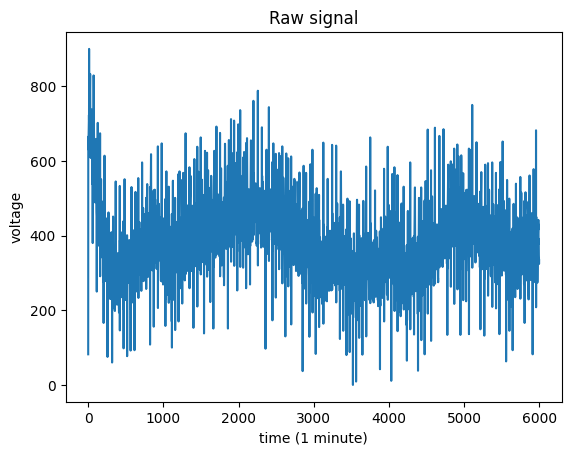

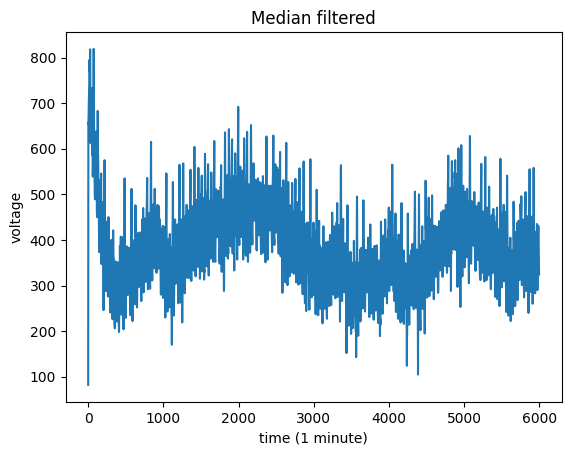

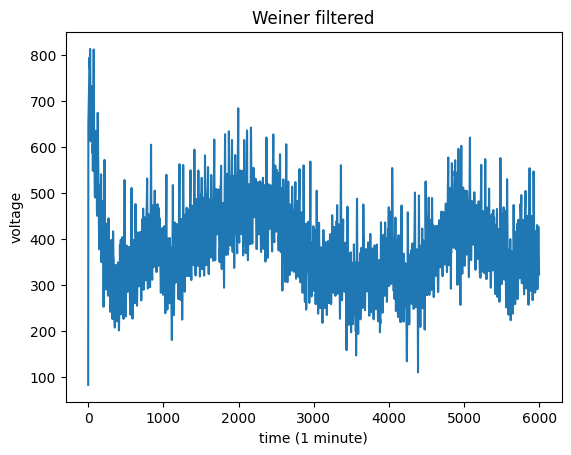

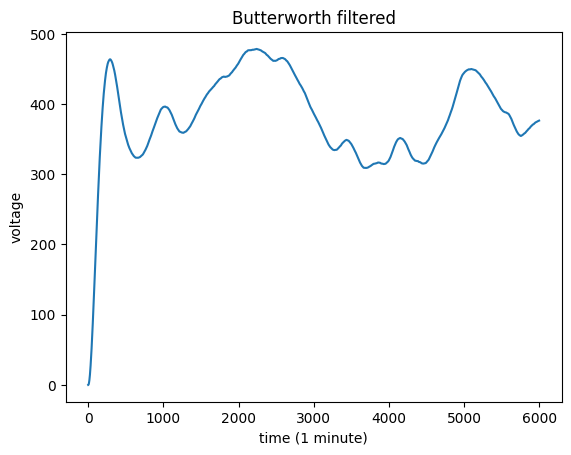

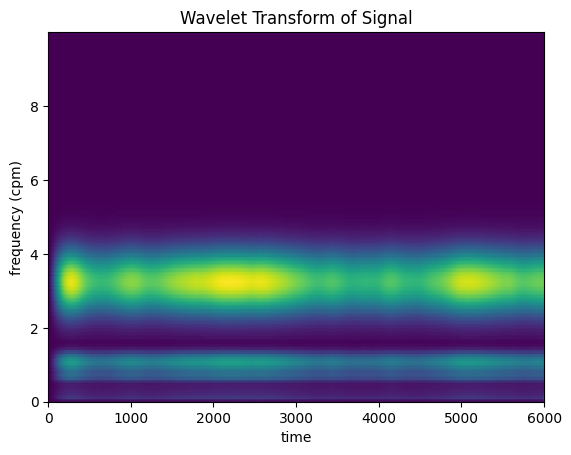

In [2]:
import pickle
from statistics import median
import matplotlib.pyplot as plt
import numpy as np
from time2go.processingToolbox import processingToolbox
from scipy import signal

with open('sampleWindow.pkl', 'rb') as f:
    sample = pickle.load(f)

window = 6000

plt.figure()
plt.plot(np.linspace(0, window, window), sample[0:window])
plt.title("Raw signal")
plt.ylabel("voltage")
plt.xlabel("time (1 minute)")

tools = processingToolbox()

med = tools.runningMedian(sample[0:window])

plt.figure()
plt.plot(np.linspace(0, window, window), med)
plt.title("Median filtered")
plt.ylabel("voltage")
plt.xlabel("time (1 minute)")

weiner = tools.weinerFilter(med)

plt.figure()
plt.plot(np.linspace(0, window, window), weiner)
plt.title("Weiner filtered")
plt.ylabel("voltage")
plt.xlabel("time (1 minute)")

butter = tools.butterworthFilter(weiner)

plt.figure()
plt.plot(np.linspace(0, window, window), butter)
plt.title("Butterworth filtered")
plt.ylabel("voltage")
plt.xlabel("time (1 minute)")


plt.figure()
t, dt = np.linspace(0, 6000, 6000, retstep=True)
fs = 1/dt
w = 2.
#sig = np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)
freq = np.linspace(0, 10*fs, 100)
widths = w*fs / (2*freq*np.pi)
cwtm = signal.cwt(butter, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.title("Wavelet Transform of Signal")
plt.xlabel("time")
plt.ylabel("frequency (cpm)")
plt.show()

#plt.figure()
#freq = np.linspace(1, 100/2, 100)
#w = .15
#widths = w / (2*freq*np.pi)
#cwtm = signal.cwt(butter, signal.morlet2, widths, w=w)
#plt.pcolormesh(np.linspace(0, window, window), freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
#plt.show()

